In [5]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [6]:
tracks = pd.read_csv('../../data/processed/tracks_processed.csv', dtype=object)

tracks_genres = pd.read_csv('../../data/raw/genres.csv', dtype=object)

tracks[['track_id','track_genres_all']].head()
tracks.head()


,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,interest_factor,track_price
0,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],4656,en,1293,3,Food,2008,0.57,1.0,1.7
1,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],1470,en,514,4,Electric Ave,2008,0.57,1.0,1.7
2,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],1933,en,1151,6,This World,2008,0.57,1.0,1.7
3,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,[10],54881,en,50135,1,Freeway,2008,0.43,1.0,1.29
4,4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,"[17, 10, 76, 103]",978,en,361,3,Spiritual Level,2008,0.57,1.0,1.7


In [37]:
tracks_genres[tracks_genres['genre_id']==17]['title']

Series([], Name: title, dtype: object)

In [7]:
tracks['track_genres_all'] = tracks['track_genres_all'].map(lambda x: x.lstrip('[').rstrip(']'))
tracks['genres'] = ''

In [8]:
i = 0
pos = tracks.columns.get_loc('genres')
for genre_list in tracks['track_genres_all']:
    X_list =""
    for genre_id in genre_list.split(','):
        genre_id = genre_id.lstrip().rstrip()
        genre_title = tracks_genres[tracks_genres['genre_id']==genre_id]['title']
        X_list = ''.join(X_list + genre_title + ',')
   
    #tracks.iloc[i][pos] = X_list.rstrip(',')
    #df.set_value(i,'genres',X_list.rstrip(','))
    tracks.loc[i,'genres'] = X_list.rstrip(',')
    i += 1
#    tracks[tracks['track_genres_all'] == genre_list]['genres'] = X_list.rstrip(',') 

KeyboardInterrupt: 

In [9]:
tracks['genres']

0                                             Hip-Hop
1                                             Hip-Hop
2                                             Hip-Hop
3                                                 Pop
4         Folk,Pop,Experimental Pop,Singer-Songwriter
5         Folk,Pop,Experimental Pop,Singer-Songwriter
6         Folk,Pop,Experimental Pop,Singer-Songwriter
7         Folk,Pop,Experimental Pop,Singer-Songwriter
8         Folk,Pop,Experimental Pop,Singer-Songwriter
9                                             Hip-Hop
10                          Psych-Rock,Rock,Loud-Rock
11                          Psych-Rock,Rock,Loud-Rock
12                     Noise,Avant-Garde,Experimental
13                     Noise,Avant-Garde,Experimental
14                                               Folk
15                                               Folk
16                                               Folk
17                                               Folk
18                          

In [101]:
#tracks['genres']
    
tracks = tracks.set_index(['track_genres_all'])

tracks.head()

,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_genres,track_interest,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,interest_factor,track_price
track_genres_all,,,,,,,,,,,,,,,,,,,,,
21,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,21,4656,en,1293,3,Food,2008,0.57,1.0,1.7
21,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,21,1470,en,514,4,Electric Ave,2008,0.57,1.0,1.7
21,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,21,1933,en,1151,6,This World,2008,0.57,1.0,1.7
10,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,10,54881,en,50135,1,Freeway,2008,0.43,1.0,1.29
"17, 10, 76, 103",4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,"17, 10, 76, 103",978,en,361,3,Spiritual Level,2008,0.57,1.0,1.7


In [102]:
#tracks = tracks.dropna()

X_columns=["interest_factor"]
print(X_columns)
tracks = tracks[X_columns]

# normalize the columns

track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

#print(tracks.shape)
track_norm

['interest_factor']


/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,interest_factor
track_genres_all,
21,0.679834
21,0.679834
21,0.679834
10,0.679834
"17, 10, 76, 103",0.679834
"17, 10, 76, 103",0.679834
"17, 10, 76, 103",-0.649095
"17, 10, 76, 103",-1.645792
"17, 10, 76, 103",-1.645792


# Model Training

In [103]:
k = 7
kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 2, 3, 6}
Counter({0: 69434, 6: 16914, 2: 15532, 3: 4019})


In [104]:
tracks_results.head()

,interest_factor,cluster
track_genres_all,,
21,1.0,0
21,1.0,0
21,1.0,0
10,1.0,0
"17, 10, 76, 103",1.0,0


# Analyze the results

[('21', 1483), ('15', 1337), ('', 956), ('17', 861), ('18, 1235', 813)]
[('15', 533), ('21', 518), ('12', 447), ('', 391), ('10, 76', 356)]
[('32, 41, 38, 15', 494), ('', 369), ('15', 255), ('32, 38', 197), ('12', 171)]
[('21', 681), ('1, 38, 41, 247, 30', 649), ('15', 563), ('38', 539), ('25, 12', 512)]
interest_factor


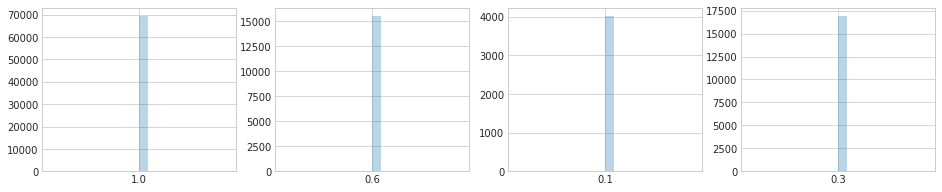

In [105]:

tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['track_genres_all']).most_common(5))
    
n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#        plt.xlim([0,tracks_results[col].max()])
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()


In [51]:
tracks_results

,track_genres_all,interest_factor,cluster
0,[21],1.0,0
1,[21],1.0,0
2,[21],1.0,0
3,[10],1.0,0
4,"[17, 10, 76, 103]",1.0,0
5,"[17, 10, 76, 103]",1.0,0
6,"[17, 10, 76, 103]",0.6,2
7,"[17, 10, 76, 103]",0.3,6
8,"[17, 10, 76, 103]",0.3,6
9,[21],1.0,0
